<a href="https://colab.research.google.com/github/KarunakarMuppuri/INFO-5731-Section-020/blob/main/INFO5731_Assignment_Three_fall2022_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
# Write your code here

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd

# Read the dataset file
with open('product_reviews.csv', 'r') as f:
    data = f.read()

tokens = word_tokenize(data)

trigrams = ngrams(tokens, 3)

tri_counts = Counter(trigrams)

bigrams = ngrams(tokens, 2)
bi_counts = Counter(bigrams)

for bg in bi_counts:
    bg_prob = bi_counts[bg] / tokens.count(bg[0])
    print(bg, bg_prob)

# Extract noun phrases
grammar = r'NP: {<DT>?<JJ>*<NN>}'
chunk_parser = nltk.RegexpParser(grammar)
tagged_tokens = nltk.pos_tag(tokens)
tree = chunk_parser.parse(tagged_tokens)

nps = []
for subtree in tree.subtrees():
    if subtree.label() == 'NP':
        np = ' '.join(word for word, tag in subtree.leaves())
        nps.append(np)

reviews = data.split('\n')

np_freqs = []
for np in nps:
    np_count = 0
    for review in reviews:
        if np in review:
            np_count += 1
    np_freqs.append(np_count)

df = pd.DataFrame(columns=nps, index=[i+1 for i in range(len(reviews))])
for i in range(len(reviews)):
    for j in range(len(nps)):
        np_prob = np_freqs[j] / max(np_freqs)
        df.iloc[i, j] = np_prob

print(df)





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


('Title', ',') 1.0
(',', 'Rating') 0.008403361344537815
('Rating', ',') 1.0
(',', 'Review') 0.008403361344537815
('Review', 'Text') 1.0
('Text', "''") 1.0
("''", 'Buen') 0.03225806451612903
('Buen', 'Equipo') 1.0
('Equipo', ',') 1.0
(',', 'Funciona') 0.008403361344537815
('Funciona', 'Bien') 1.0
('Bien', "''") 1.0
("''", ',4.0') 0.03225806451612903
(',4.0', 'out') 1.0
('out', 'of') 0.7142857142857143
('of', '5') 0.20833333333333334
('5', 'stars') 0.9090909090909091
('stars', ',') 1.0
(',', "''") 0.08403361344537816
("''", 'El') 0.03225806451612903
('El', 'envío') 1.0
('envío', 'fue') 1.0
('fue', 'rápido') 0.5
('rápido', ',') 1.0
(',', 'y') 0.01680672268907563
('y', 'el') 0.16666666666666666
('el', 'equipo') 0.14285714285714285
('equipo', 'llego') 0.5
('llego', 'en') 1.0
('en', 'buenas') 0.5
('buenas', 'condiciones') 1.0
('condiciones', 'y') 1.0
('y', 'funcionando') 0.16666666666666666
('funcionando', 'perfectamente.Nota') 1.0
('perfectamente.Nota', ':') 1.0
(':', 'Si') 0.5
('Si', 'tien

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [
    "I had an older Fire 7, and it didnâ€™t have any memory or slots for memory cards. It had its limitations with using Amazon Apps from the App Store. For a first time tablet I guess it was ok, it was a learning curve because it was different than a laptop.I saw to new Fire 10 this year on sale and thought Iâ€™d give it a try. Itâ€™s still Wi-Fi only, but the larger screen is much nicer than the  7. I noticed when typing it is a difficult reach to some of the letters, but I have smaller hands so that may be why. Iâ€™m learning to work around it.I found a way to add Google Play to the Fire 10, and this has enhanced the entire functionality of the Fire 10. Iâ€™m not stuck using only Amazon Apps which are limited. I googled how to add Google Play to Amazon Fire 10. I think thereâ€™s info on how to add to other versions oFore Tablets also. If you follow the directions it was pretty simple. It enhanced my usage of my Fire Table tremendously.It seems to have a fast processor. This will also depend on how fast your home Wi-Fi is also.I see many improvements with the Fire 10 from my Fire 7. I canâ€™t say for certain if this would be worth the upgrade of a more recent Fire Tablet.Overall, so far I am happy with this tablet. I havenâ€™t had too long so I donâ€™t know if I will find anything else the more I use it.",
    "El envÃ­o fue rÃ¡pido, y el equipo llego en buenas condiciones y funcionando perfectamente.Nota: Si tienes una lÃ­nea telefÃ³nica de cÃ³digo +1  o no requieres crear una nueva cuenta de Amazon para enlazar la tablet, es muy seguro que la informaciÃ³n siguiente no te interese.El motivo por el cual no le doy cinco estrellas es por la parte del registro del equipo. Para acceder a la tablet necesitas tener una cuenta de Amazon. HabÃ­a comprado 2 equipos, uno para mÃ­ y otro era para otra persona. Al momento de querer configurar la tablet de la otra persona, este no tenÃ­a cuenta de Amazon, asÃ­ que decidÃ­ crear una  cuenta. No obstante, se me hizo muy engorroso debido a que esta vez para la creaciÃ³n de la cuenta me pedÃ­a verificar la nueva cuenta con un correo o nÃºmero telefÃ³nico. Colocaba el correo, me llegaba el cÃ³digo de verificaciÃ³n al correo, verificaba y luego me pedÃ­a validar un nÃºmero telefÃ³nico. No obstante, nunca me llegaba el cÃ³digo de verificaciÃ³n al nÃºmero telefÃ³nico. Cabe destacar que soy de Venezuela por lo que mi cÃ³digo es +58.Posteriormente, contacte a soporte para ver porque no me llegaba el cÃ³digo de verificaciÃ³n a mi nÃºmero telefÃ³nico. Ellos alegaban que se podÃ­a registrar la cuenta con solo el correo, pero en mi caso me pedÃ­a verificar correo y nÃºmero telefÃ³nico. Al final,  despuÃ©s de tratar con varias cosas que me habÃ­an sugerido, tuve que registrar la cuenta con un nÃºmero telefÃ³nico de estados unidos +1, y fue asÃ­ que pude crear la cuenta para la otra tablet.",
    "I wanted a tablet that would allow my daughter to: surf the Internet, email and exchange photos with her friends, listen to music, play a few games, and enjoy learning activities.  She is also fond of watching Christian movies and watching her favorite pastorsâ€™ Sunday sermons.  The â€œFireâ€ provides those opportunities at a bargain price.  An iPad would have been an unnecessary tremendous expense.  Thus far, the â€œFireâ€ is working well for her because the controls are so intuitive.  My effort was needed to set it up, but afterwards, I just handed it over to her and she has successfully figured it all out on her own.  This tablet would be perfect for any school-aged child to use with little parental effort, except that needed to monitor safety from predators, evil websites, and the flood of spam mail.  A little encouragement to only share her email address with family members and a small, trusted group of friends seems to have limited spam mail to some extent.  If she doesnâ€™t immediately recognize the sender, she deletes it without opening it.  This tablet has been a good device for us all.  A protective case of some sort to protect the screen is a wise precaution, and my daughter enjoyed picking it out.",
    "I ordered one of these for travel in my car on long road trips with the grandkids. Mine was a option that I was quite impressed with. I was able to download some movies to play periodically on the trips and a few of the kids game for the younger grandkids. I liked the screen quality and size for viewing. I ordered another one for my 12 year old grand daughter (after liking the quality of mine) for Christmas. She previously had the kids amazon Fire which worked well when she was younger. This Fire option gives them a little more freedom and better viewing. The only drawback is the lack of ad free and the kids apps. I wish they would design an app for their Fire's that you could purchase (even yearly) to prevent the ads. They make it difficult for some of the kids to maneuver. The price was also good, I did get it with their sale.",
    "This is great for the purpose intended. It's not a full blown android tablet, so if that's what your looking for, better go get one of those. For doing Amazon related stuff and surfing the internet, all while feeding you Amazon marketing, it's great. I've had half a dozen over the years and for the money, they're great. They do slow down alot after a year or two, but if you wait till Christmas time, you can replace with a new model for about half the retail price. If your kids need a tablet and your hesitant to give them a several hundred dollar device, this is the ticket. It even plays games, only Amazon store games, but there's a decent selection. So, there's my opinion on them. I'll probably get another one next year to replace the one of the fire 8s that are still running strong but slow. The 10s are great. Hopefully a new model will come along soon."
]

query = "The Amazon Fire HD 10 tablet, 10.1 1080p Full HD, 32 GB, latest model (2021 release) in Lavender is a versatile and affordable tablet that offers impressive features and performance. Compared to the 2021 iPad basic model, the Fire HD 10 offers a similar screen size and resolution, but at a lower price point.The Fire HD 10 tablet is great for streaming, browsing the web, and basic productivity tasks, thanks to its powerful octa-core processor and 3 GB of RAM. The 10.1-inch Full HD display is vibrant and clear, making it ideal for watching videos or reading e-books. The tablet also features Alexa, Amazon's virtual assistant, which can be used to control smart home devices, answer questions, and more.One major advantage of the Fire HD 10 over the 2021 iPad basic model is the price. The Fire HD 10 retails for around $150, while the iPad basic model starts at $329. While the iPad does offer a slightly more powerful processor and access to a larger selection of apps, the Fire HD 10 provides a great value for those on a budget.In terms of storage, the Fire HD 10 comes with 32 GB of internal storage, which can be expanded up to 1 TB with a microSD card. The tablet also has a front-facing camera for video calls and a rear-facing camera for taking photos and videos.Overall, the Amazon Fire HD 10 tablet is a great option for those looking for a versatile and affordable tablet. While it may not have all the bells and whistles of the 2021 iPad basic model, it provides solid performance and features at a fraction of the price. The Lavender color also adds a nice touch of personality and style."

vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = vectorizer.fit_transform(documents)

query_tfidf = vectorizer.transform([query])

cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

document_scores = [(i, score) for i, score in enumerate(cosine_similarities)]
document_scores = sorted(document_scores, key=lambda x: x[1], reverse=True)

print("Ranked Documents:")
for i, score in document_scores:
    print(f"Document {i+1}: {documents[i]} (Cosine Similarity Score: {score:.2f})")





Ranked Documents:
Document 1: I had an older Fire 7, and it didnâ€™t have any memory or slots for memory cards. It had its limitations with using Amazon Apps from the App Store. For a first time tablet I guess it was ok, it was a learning curve because it was different than a laptop.I saw to new Fire 10 this year on sale and thought Iâ€™d give it a try. Itâ€™s still Wi-Fi only, but the larger screen is much nicer than the  7. I noticed when typing it is a difficult reach to some of the letters, but I have smaller hands so that may be why. Iâ€™m learning to work around it.I found a way to add Google Play to the Fire 10, and this has enhanced the entire functionality of the Fire 10. Iâ€™m not stuck using only Amazon Apps which are limited. I googled how to add Google Play to Amazon Fire 10. I think thereâ€™s info on how to add to other versions oFore Tablets also. If you follow the directions it was pretty simple. It enhanced my usage of my Fire Table tremendously.It seems to have a fast

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
#Creating model
import pandas as pd
from gensim.models import Word2Vec

reviews_df = pd.read_csv("product_reviews.csv")

reviews = reviews_df["Review Text"].tolist()

review_sentences = [review.split() for review in reviews]

model = Word2Vec(sentences=review_sentences, vector_size=300, window=5, min_count=1, workers=4)

model.save("word2vec.model")


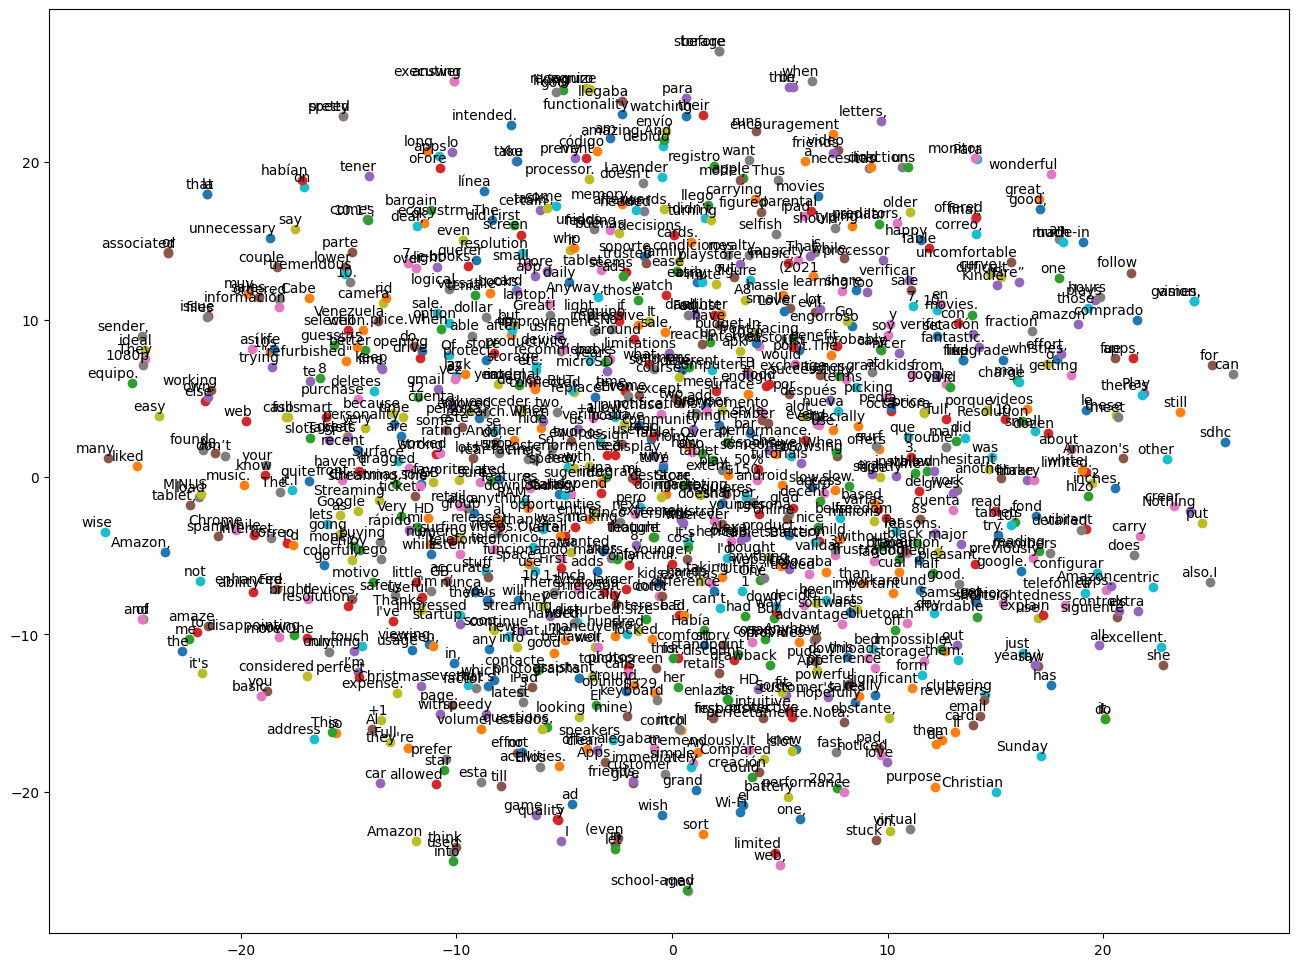

In [ ]:
#visualize the model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

model = Word2Vec.load("word2vec.model")
word_vectors = model.wv.vectors

tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

words = list(model.wv.key_to_index.keys())

# Plot the 2-dimensional word embeddings
plt.figure(figsize=(16, 12))
for i, word in enumerate(words):
    x, y = word_vectors_2d[i, :]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file

https://github.com/KarunakarMuppuri/INFO-5731-Section-020/blob/main/annotated_reviews.csv

# Link: 



